$$
Deep \ Learning \\RNN
$$

**Travail réalisé par:**
Achraf Habib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
import os

source_dir = "/content/drive/MyDrive/DL: TP4"

# Destination directory where the files will be copied
destination_dir = "/content"

# List of files to be copied
file1 = "/content/drive/MyDrive/DL: TP4/IMDB Dataset.csv.zip"
file2 = "/content/drive/MyDrive/DL: TP4/glove.6B.100d.txt.zip"

# Copy the files to the destination directory
shutil.copy(file1, destination_dir)
shutil.copy(file2, destination_dir)

print("Files copied successfully.")


Files copied successfully.


In [ ]:
!unzip -q "/content/IMDB Dataset.csv.zip"
!unzip -q /content/glove.6B.100d.txt.zip
!rm "/content/IMDB Dataset.csv.zip" /content/glove.6B.100d.txt.zip
!rm -r sample_data

In [ ]:
drive.flush_and_unmount()

### Imports

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
import tensorflow as tf

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import GlobalMaxPooling1D, MaxPooling1D
from keras.layers import LSTM, GRU, SimpleRNN
from keras.layers import Embedding

In [ ]:
pd.options.display.max_colwidth = None

### Importation du dataset

In [ ]:
movie_reviews = pd.read_csv("/content/IMDB Dataset.csv")
movie_reviews

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

**Dimensions du dataset**

In [ ]:
print("Dimensions du dataset :", movie_reviews.shape)

Dimensions du dataset : (50000, 2)


**Vérifier s'il y a des valeurs NULL**

In [ ]:
movie_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
movie_reviews.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
movie_reviews.isna().sum()

review       0
sentiment    0
dtype: int64

**Afficher les 5 premières lignes**

In [ ]:
movie_reviews.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

**Equilibre du Dataset**

In [ ]:
movie_reviews['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

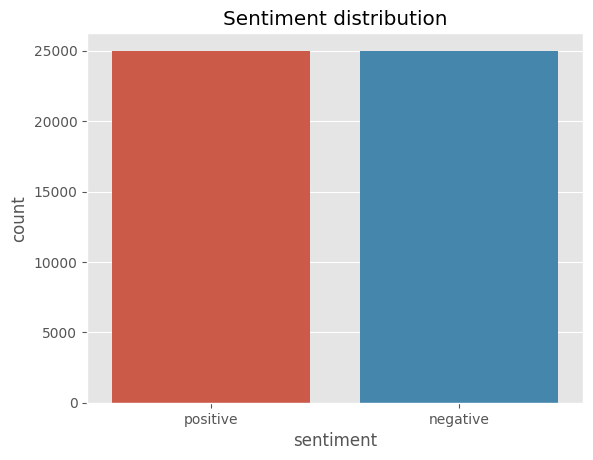

In [ ]:
sns.countplot(x='sentiment', data=movie_reviews, hue='sentiment')
plt.title("Sentiment distribution")
plt.show()

> Le dataset est équilibré *positif= 25000, negatif=25000*

**Afficher le 4ème review**

In [ ]:
print("4ème review :")
pd.DataFrame(movie_reviews.iloc[3]).T

4ème review :


,review,sentiment
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.",negative


> les reviews dont le sentiment est negative contient des mots spécifique telque '''meaningless, ruins the film, 3 out of 10 ... ''' qui reflète le sentiment

> dans les reviews il existe des Tags de HTML telque '''br/> ''' probablement car le dataset a été scraped depuis un site web

$$$$

### Data Preprocessing

**1. code et explication**

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
 return TAG_RE.sub('', text)


def preprocess_text(sen):
 # Removing html tags
 sentence = remove_tags(sen)

 # Remove punctuations and numbers
 sentence = re.sub('[^a-zA-Z]', ' ', sentence)

 # Single character removal
 sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

 # Removing multiple spaces
 sentence = re.sub(r'\s+', ' ', sentence)
 return sentence


> Ce code définit une fonction `preprocess_text` qui prend une chaîne de caractères en entrée `sen`. Cette fonction effectue plusieurs opérations de prétraitement sur le texte :
   * Suppression des balises HTML en utilisant la fonction `remove_tags`.
    * La fonction `remove_tags` supprime toutes les balises HTML du texte en utilisant une expression régulière.
   * Suppression des ponctuations et des chiffres en utilisant une expression régulière.
   * Suppression des caractères individuels qui sont souvent des bruits indésirables dans le texte.
   * Suppression des espaces multiples pour nettoyer le texte.

> Ceci est une étape cruciale pour élimner le texte indésirable et qui n'a pas de valeur ajoutée dans la prédiction

**Prétraitement des reviews et stockage dans une liste**

In [ ]:
from tqdm import tqdm

In [ ]:
X = []
sentences = list(movie_reviews['review'])
for sen in tqdm(sentences):
 X.append(preprocess_text(sen))

100%|██████████| 50000/50000 [00:10<00:00, 4905.71it/s]


In [ ]:
import sys
total_size = sum(sys.getsizeof(s) for s in X)
print("Taille mémoire totale de X en Mo :", total_size/ 1024 / 1024)

Taille mémoire totale de X en Mo : 60.588154792785645


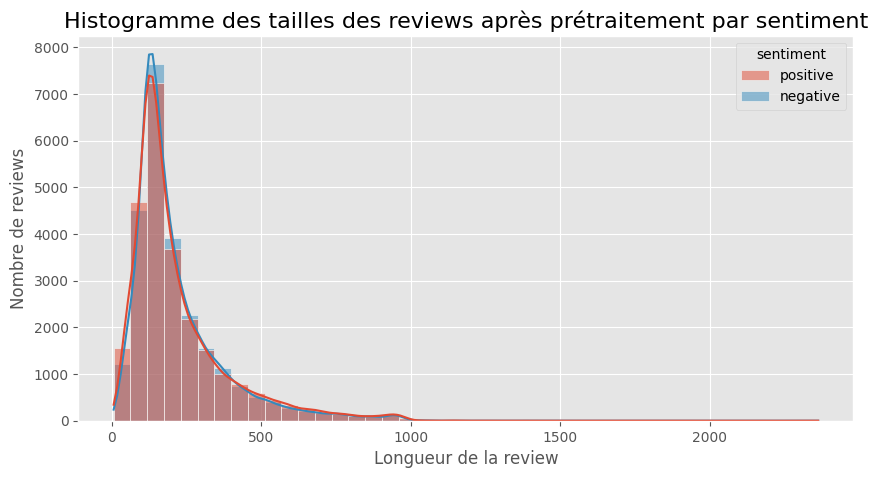

In [ ]:
movie_reviews['cleaned_review'] = movie_reviews['review'].apply(preprocess_text)
movie_reviews['review_length'] = movie_reviews['cleaned_review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(data=movie_reviews, x='review_length', hue='sentiment', kde=True, bins=42)
movie_reviews.drop(['review_length','cleaned_review'],axis=1, inplace=True)
plt.title("Histogramme des tailles des reviews après prétraitement par sentiment",fontsize=16)
plt.xlabel("Longueur de la review")
plt.ylabel("Nombre de reviews")
plt.show()

**Réafficher le 4ème Review**

In [ ]:
pd.DataFrame({'review':[X[3]],'sentiment':['negative']})

,review,sentiment
0,Basically there a family where little boy Jake thinks there a zombie in his closet his parents are fighting all the time This movie is slower than soap opera and suddenly Jake decides to become Rambo and kill the zombie OK first of all when you re going to make film you must Decide if its thriller or drama As drama the movie is watchable Parents are divorcing arguing like in real life And then we have Jake with his closet which totally ruins all the film expected to see BOOGEYMAN similar movie and instead watched drama with some meaningless thriller spots out of just for the well playing parents descent dialogs As for the shots with Jake just ignore them,negative


> Les HTML tags, la ponctuation et les charactères non alphabétiques ont été supprimés telque `3, 10, & <br/>, ...`

**4. Convertir les étiquettes en chiffres**

In [ ]:
y = movie_reviews['sentiment']
y = np.array(list(map(lambda x: 1 if x=="positive" else 0, y)))
y.shape

(50000,)

In [ ]:
y[:5]

array([1, 1, 1, 0, 1])

**5. Diviser le dataset en train et test**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
len(X_train),y_test.shape

(40000, (10000,))

$$$$

### Embedding Layer

**Tokenization**

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

In [ ]:
print(f'vocab size: {len(tokenizer.word_index)}')
print(tokenizer.word_index)

vocab size: 92546
{'the': 1, 'and': 2, 'of': 3, 'to': 4, 'is': 5, 'it': 6, 'in': 7, 'this': 8, 'that': 9, 'was': 10, 'as': 11, 'movie': 12, 'for': 13, 'with': 14, 'but': 15, 'film': 16, 'you': 17, 'on': 18, 'not': 19, 'are': 20, 'he': 21, 'his': 22, 'have': 23, 'one': 24, 'be': 25, 'all': 26, 'at': 27, 'they': 28, 'by': 29, 'an': 30, 'who': 31, 'so': 32, 'from': 33, 'like': 34, 'there': 35, 'or': 36, 'just': 37, 'her': 38, 'out': 39, 'about': 40, 'if': 41, 'has': 42, 'what': 43, 'some': 44, 'good': 45, 'can': 46, 'more': 47, 'very': 48, 'when': 49, 'she': 50, 'up': 51, 'no': 52, 'time': 53, 'my': 54, 'even': 55, 'would': 56, 'which': 57, 'story': 58, 'only': 59, 'really': 60, 'see': 61, 'their': 62, 'had': 63, 'me': 64, 'well': 65, 'we': 66, 'were': 67, 'than': 68, 'much': 69, 'bad': 70, 'been': 71, 'get': 72, 'do': 73, 'people': 74, 'great': 75, 'other': 76, 'also': 77, 'will': 78, 'into': 79, 'how': 80, 'because': 81, 'don': 82, 'first': 83, 'him': 84, 'most': 85, 'made': 86, 'then':

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_train[3])
#chaque mot => index dans le vocab

NameError: name 'X_train' is not defined

In [ ]:
tokenizer.sequences_to_texts([X_train[3]])

['this latter day fulci is totally abysmal dealing with an who decides style to pay off his ever rising by some of the you will ever lay your eyes on and who just happen to be wealthy the fulci script also to few comedic elements which only result in some unfunny business involving corpse which won stay put an opera singer victim who won stop singing etc not to mention theme straight out of the student of although in this case the two via pre recorded radio messages in the end can say m surprised that this film shows no sign of the of mario for the which it resembles in several ways and that it is content to merely pile up the gory but none too convincing effects of and or faces with which alas fulci had by then become completely associated']

**Padding**

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) # truncation = pre
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen) # truncation = pre

In [ ]:
print(X_train[3])

[1663  777   57   59  924    7   44 1974  950 1164 3355   57  376  754
  264   30 1318 1746 1326   31  376  529 1135  491   19    4  736  745
  701   39    3    1 1320    3  251    7    8  407    1  103 2654 1749
 3813 1420 3515    7    1  125   46  130  147  749    9    8   16  266
   52 1975    3    1    3 3626   13    1   57    6 3735    7  430  752
    2    9    6    5 1428    4 1563 2543   51    1 2037   15  610   94
 1064  276    3    2   36 1415   14   57 2990 2628   63   29   87  428
  332 3432]


In [ ]:
tokenizer.sequences_to_texts([X_train[3]])

['comedic elements which only result in some unfunny business involving corpse which won stay put an opera singer victim who won stop singing etc not to mention theme straight out of the student of although in this case the two via pre recorded radio messages in the end can say m surprised that this film shows no sign of the of mario for the which it resembles in several ways and that it is content to merely pile up the gory but none too convincing effects of and or faces with which alas fulci had by then become completely associated']

**GloVe Embeddings**

In [ ]:
embeddings_dictionary = dict()
glove_file = open("glove.6B.100d.txt", encoding="utf8")

for line in glove_file:
    records = line.split()

    word = records[0]
    vector_dimensions = np.asarray(records[1:],dtype='float32')
    embeddings_dictionary[word] = vector_dimensions

glove_file.close()

In [ ]:
embeddings_dictionary.get('meaningless')

In [ ]:
#compare les mots du vocab et les mots du glove
embed_keys = embeddings_dictionary.keys()
vocab_words = tokenizer.word_index.keys()
word_embed = embeddings_dictionary.get('meaningless')
print(f'There is {len(embed_keys)} word in the GloVe Embeddings')
print(f'the size of the embedding is {word_embed.shape}')
print(f'the first 8 values of the embedding of the word meaningless {word_embed[:8]})')

if set(vocab_words).issubset(set(embed_keys)):
  print(f'All words in the vocab are contained in the GloVe Embeddings')
else:
  print(f'These are the words that do not belong:')
  print(set(vocab_words) - set(embed_keys))
  print(f'{len(set(vocab_words) - set(embed_keys))} words do not belong in the GloVe embeddings')

There is 400000 word in the GloVe Embeddings
the size of the embedding is (100,)
the first 8 values of the embedding of the word meaningless [-0.56444   -0.0076193  0.55445   -0.13582   -0.21588    0.62206
  0.40397    0.14081  ])
These are the words that do not belong:
{'fieldsian', 'adibah', 'jesminder', 'overwhlelming', 'whovier', 'genxers', 'litovsk', 'takarada', 'uninspriring', 'powaqatsi', 'bansihed', 'frailed', 'tradegy', 'cheezoid', 'brauss', 'toly', 'ferdanand', 'notleast', 'fakeout', 'afterdark', 'swasa', 'understanda', 'swithen', 'aaaaaaaaaaaahhhhhhhhhhhhhh', 'moveiegoing', 'beswicke', 'getinvolved', 'disquilification', 'borske', 'stellwaggen', 'slipknotian', 'deuchennes', 'misdrawing', 'brandos', 'yellowcoats', 'binev', 'akenaten', 'hisaichi', 'hahahah', 'cineteca', 'dunebuggies', 'burnadette', 'valleta', 'tohma', 'privees', 'zanta', 'themall', 'olmes', 'labratory', 'slitter', 'garriazzo', 'stetner', 'largeman', 'kayyyy', 'mismarketed', 'iaac', 'ewashen', 'gleckler', 'commp

**Embedding Matrix**

In [ ]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
embedding_matrix.shape

(92547, 100)

$$$$

### Classification avec un Réseau de neurones simples

In [ ]:
# Créationdu mpdèle
model_DNN = Sequential([
    Embedding(vocab_size,
              100,
              weights=[embedding_matrix],
              input_length=maxlen,
              trainable=False),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_DNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 9264701 (35.34 MB)
Trainable params: 10001 (39.07 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [ ]:
# Compilation du modèle
model_DNN.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
# Hyperparameters
epochs = 6
batch_size = 128

In [ ]:
# Entraînement du modèle
history = model_DNN.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 3s 8ms/step - loss: 0.6127 - acc: 0.6639 - val_loss: 0.5443 - val_acc: 0.7272
Epoch 2/6
250/250 [==============================] - 3s 11ms/step - loss: 0.5005 - acc: 0.7593 - val_loss: 0.5166 - val_acc: 0.7437
Epoch 3/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4643 - acc: 0.7823 - val_loss: 0.5198 - val_acc: 0.7408
Epoch 4/6
250/250 [==============================] - 3s 11ms/step - loss: 0.4396 - acc: 0.7989 - val_loss: 0.5178 - val_acc: 0.7461
Epoch 5/6
250/250 [==============================] - 2s 6ms/step - loss: 0.4232 - acc: 0.8065 - val_loss: 0.5273 - val_acc: 0.7440
Epoch 6/6
250/250 [==============================] - 2s 7ms/step - loss: 0.4118 - acc: 0.8128 - val_loss: 0.5335 - val_acc: 0.7454


**Evaluation du modèle**

In [ ]:
score = model_DNN.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.5346 - acc: 0.7437
Test Score: 0.534572422504425
Test Accuracy: 0.7437000274658203


**Model History**

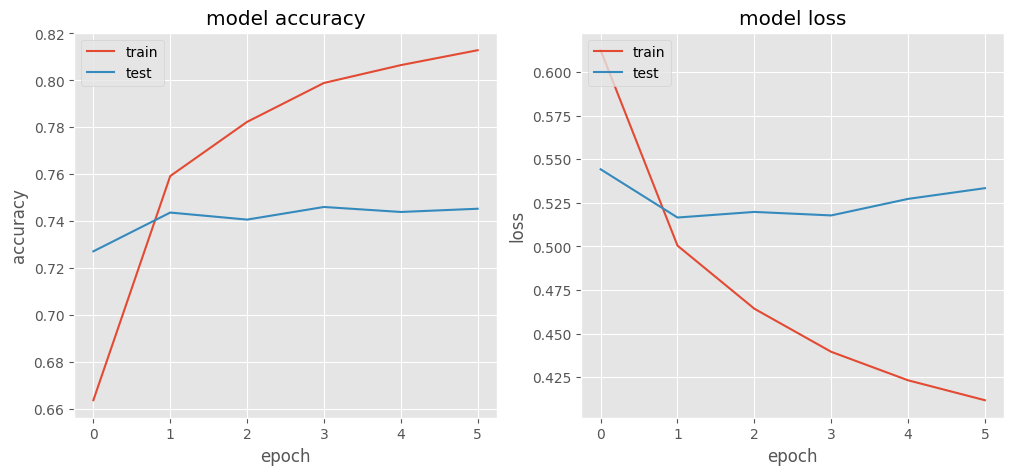

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

> D'après les courbes, on observe un phénomène de surapprentissage (Overfitting), notamment dès le début de l'epoch 1 :
  * Dans la figure de l'`Accuracy`, la courbe d'entraînement montre une amélioration continue tandis que celle de validation stagne autour de la valeur 0.74, ce qui indique un écart significatif entre les deux.
  * Pour la figure de la `Loss`, la courbe d'entraînement continue à diminuer avec les epochs, tandis que celle de validation commence à augmenter dès le premier epoch. L'écart entre les deux courbes devient de plus en plus important.

> Ce problème découle de la simplicité du réseau de neurones, qui peine à capturer les caractéristiques complexes du jeu de données. Des améliorations peuvent être apportées à ce modèle en ajoutant des couches avant et après la couche `Flatten`, ainsi qu'en introduisant des techniques telles que le dropout pour régulariser le modèle.

> Cependant, il convient de noter que ce type de réseau de neurones n'est pas adapté aux tâches de séquences, comme le traitement du texte. Pour tenir compte de la structure séquentielle des données, d'autres approches plus sophistiquées, telles que les réseaux de neurones convolutionnels, récurrents ou les transformers, peuvent être envisagées. Ces architectures sont mieux adaptées pour capturer les informations spatiales et séquentielles des tokens dans le texte.

$$$$

### Classification avec un réseau de neurones convolutionnel


In [ ]:
from tensorflow.keras.layers import MaxPooling1D, GlobalMaxPooling1D

In [ ]:
# Créationdu modèle
model_CNN = Sequential([
    Embedding(vocab_size,
              100,
              weights=[embedding_matrix],
              input_length=maxlen,
              trainable=False),
    Conv1D(filters=128,
           kernel_size=5,
           activation='relu'),
    GlobalMaxPooling1D(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_CNN.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9318957 (35.55 MB)
Trainable params: 64257 (251.00 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [ ]:
# Compilation du modèle
model_CNN.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
# Entraînement du modèle
history = model_CNN.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 32s 124ms/step - loss: 0.5151 - acc: 0.7412 - val_loss: 0.3982 - val_acc: 0.8199
Epoch 2/6
250/250 [==============================] - 30s 122ms/step - loss: 0.3719 - acc: 0.8352 - val_loss: 0.3736 - val_acc: 0.8286
Epoch 3/6
250/250 [==============================] - 30s 121ms/step - loss: 0.3201 - acc: 0.8658 - val_loss: 0.4086 - val_acc: 0.8146
Epoch 4/6
250/250 [==============================] - 26s 103ms/step - loss: 0.2809 - acc: 0.8856 - val_loss: 0.3441 - val_acc: 0.8449
Epoch 5/6
250/250 [==============================] - 30s 119ms/step - loss: 0.2467 - acc: 0.9045 - val_loss: 0.3468 - val_acc: 0.8426
Epoch 6/6
250/250 [==============================] - 30s 119ms/step - loss: 0.2157 - acc: 0.9213 - val_loss: 0.3955 - val_acc: 0.8284


**Evaluation du modèle**

In [ ]:
score = model_CNN.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.3896 - acc: 0.8288
Test Score: 0.3895539343357086
Test Accuracy: 0.8288000226020813


**Model History**

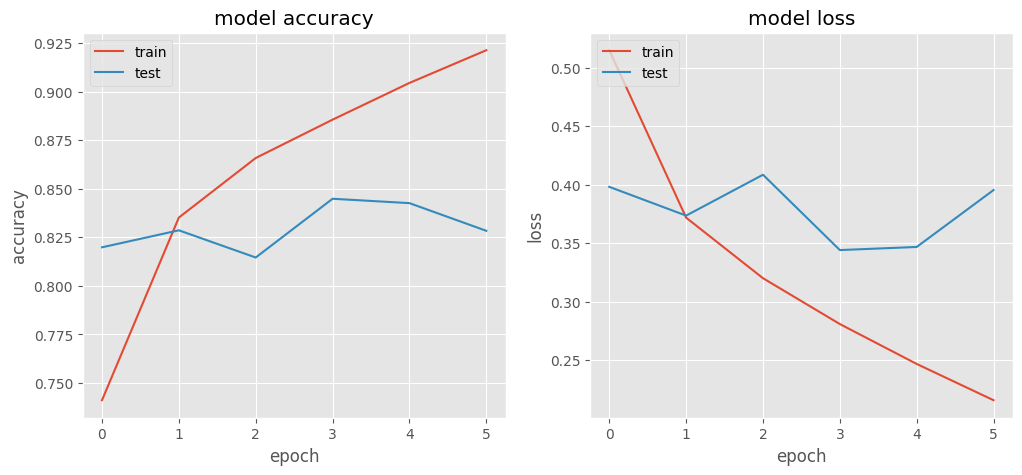

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

$$$$

**Classification avec un réseau de neurones récurrent (LSTM)**

In [ ]:
# Créationdu modèle
model_LSTM = Sequential([
    Embedding(vocab_size,
              100,
              weights=[embedding_matrix],
              input_length=maxlen,
              trainable=False),
    LSTM(units=128),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_LSTM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9372077 (35.75 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [ ]:
# Compilation du modèle
model_LSTM.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [ ]:
# Entraînement du modèle
history = model_LSTM.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 94s 366ms/step - loss: 0.5484 - acc: 0.7189 - val_loss: 0.4762 - val_acc: 0.7825
Epoch 2/6
250/250 [==============================] - 89s 356ms/step - loss: 0.4550 - acc: 0.7870 - val_loss: 0.4122 - val_acc: 0.8092
Epoch 3/6
250/250 [==============================] - 104s 417ms/step - loss: 0.4107 - acc: 0.8134 - val_loss: 0.3797 - val_acc: 0.8257
Epoch 4/6
250/250 [==============================] - 95s 378ms/step - loss: 0.3702 - acc: 0.8352 - val_loss: 0.3710 - val_acc: 0.8319
Epoch 5/6
250/250 [==============================] - 105s 419ms/step - loss: 0.3491 - acc: 0.8450 - val_loss: 0.3410 - val_acc: 0.8512
Epoch 6/6
250/250 [==============================] - 90s 360ms/step - loss: 0.3259 - acc: 0.8566 - val_loss: 0.3435 - val_acc: 0.8510


**Evaluation du modèle**

In [ ]:
score = model_LSTM.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 22s 70ms/step - loss: 0.3414 - acc: 0.8519
Test Score: 0.34137359261512756
Test Accuracy: 0.8518999814987183


**Model History**

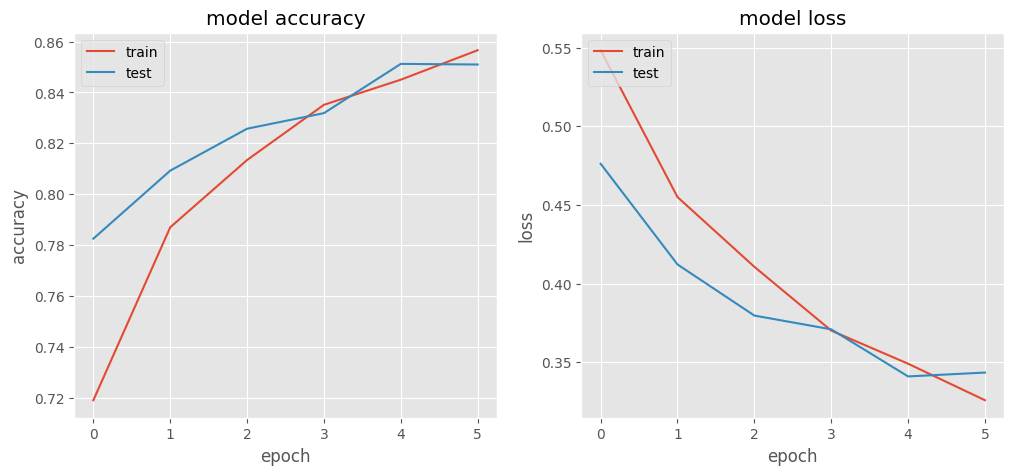

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

**4. Comparer les 3 classifieurs**

In [ ]:
pd.DataFrame({'Model': ['DNN','CNN','LSTM'],'Loss': [0.534, 0.389, 0.341],'Accuracy': [0.743, 0.828, 0.851]})

,Model,Loss,Accuracy
0,DNN,0.534,0.743
1,CNN,0.389,0.828
2,LSTM,0.341,0.851


**5. Choisir une instance aléatoirement et prédire le sentiment**

In [ ]:
idx = np.random.randint(0, len(X_test)-1)
instance = X_test[idx]
sentiment = y_test[idx]
sentiment = 'positive' if sentiment == 1 else 'negative'

pd.DataFrame({'review':[tokenizer.sequences_to_texts([instance])[0]],'sentiment':[sentiment]})

,review,sentiment
0,sitting in yellow control room and as if something exciting is going to happen it doesn so don get your hopes up the best thing about this movie is to see james best and in something other than there famous tv personalities and that is to find anything good and do not get me started on the music which was totally composed of some large and this movie is as close as have given one yet but it gets the because actually was able to finish this cure and didn have to leave in the middle avoid at all costs,negative


In [ ]:
models = [model_DNN, model_CNN, model_LSTM]
models_name =  ['DNN','CNN','LSTM']
data = {'model':[],'logit': [], 'prediction':[],'ground_truth': []}
for model_name, model in zip(models_name , models):
    prediction = model.predict(np.array(instance).reshape(1, -1),verbose=0)
    prediction = prediction.squeeze()
    data['model'].append(model_name)
    data['logit'].append(f'{prediction:.3f}')
    data['prediction'].append('positive' if prediction > 0.5 else 'negative')
    data['ground_truth'].append(sentiment)

pd.DataFrame(data)

,model,logit,prediction,ground_truth
0,DNN,0.666,positive,negative
1,CNN,0.452,negative,negative
2,LSTM,0.180,negative,negative


**6. Constatation**

> En analysant les résultats des trois modèles de classification `DNN`, `CNN` et `LSTM`, ainsi que les prédictions pour quelques instances, voici ce que l'on peut remarquer :
  * **Performances des modèles** :
Le modèle LSTM obtient la perte la plus basse et le plus haut taux de précision, suivi par le modèle CNN, puis le modèle DNN. Cela suggère que le modèle LSTM est le plus performant parmi les trois dans la classification des sentiments.
  * Le modèle LSTM atteint une précision de 0.851, le modèle CNN atteint 0.828, et le modèle DNN atteint 0.743. Ces résultats indiquent que le modèle LSTM surpasse les autres en termes de précision.
  * **Prédictions pour quelques instances** :
  Pour le modèle DNN, il prédit une instance comme positive alors que sa polarité réelle est négative.

> En résumé, le modèle LSTM surpasse les autres en termes de performances globales, avec la perte la plus basse et le taux de précision le plus élevé. En outre, les prédictions montrent que le modèle LSTM et le modèle CNN ont mieux performé que le modèle DNN, ce qui prouve que le DNN ne sont pas adaptés aux données séquentielles.

$$$$

## Partie Compte Rendu

In [ ]:
# @title Helper Functions
def create_lstm_model(embedding_matrix,output_dim=100):
  # Créationdu modèle
  model= Sequential([
      Embedding(vocab_size,
                output_dim,
                weights=[embedding_matrix],
                input_length=maxlen,
                trainable=False),
      LSTM(units=128),
      Dense(1, activation='sigmoid')
  ])

  # Compiler le modèle
  model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc'])

  return model

def create_gru_model(embedding_matrix, output_dim=100):
  # Créationdu modèle
  model= Sequential([
      Embedding(vocab_size,
                output_dim,
                weights=[embedding_matrix],
                input_length=maxlen,
                trainable=False),
      GRU(units=128),
      Dense(1, activation='sigmoid')
  ])

  # Compiler le modèle
  model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc'])

  return model

def create_rnn_cnn_model(embedding_matrix, output_dim=100):
  # Créationdu modèle
  model= Sequential([
      Embedding(vocab_size,
                output_dim,
                weights=[embedding_matrix],
                input_length=maxlen,
                trainable=False),
      Conv1D(filters=128, kernel_size=5, activation='relu'),
      MaxPooling1D(),
      SimpleRNN(units=128),
      Dense(1, activation='sigmoid')
  ])

  # Compiler le modèle
  model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['acc'])

  return model

def train_model(model):
  history = model.fit(X_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        validation_split=0.2)
  return history

def plot_history(history,suptitle=None):

  plt.figure(figsize=(12,5))
  if suptitle:
    plt.suptitle(suptitle)
  plt.subplot(121)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','test'], loc='upper left')
  plt.show()

def evaluate_model(model):
  score = model.evaluate(X_test, y_test, verbose=1)
  print("Test Score:", score[0])
  print("Test Accuracy:", score[1])

### GloVe

**GRU model**

In [ ]:
model = create_gru_model(embedding_matrix)
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9343149 (35.64 MB)
Trainable params: 88449 (345.50 KB)
Non-trainable params: 9254700 (35.30 MB)
_________________________________________________________________


In [ ]:
history = train_model(model)

Epoch 1/6
250/250 [==============================] - 127s 490ms/step - loss: 0.5132 - acc: 0.7374 - val_loss: 0.4051 - val_acc: 0.8195
Epoch 2/6
250/250 [==============================] - 82s 329ms/step - loss: 0.3881 - acc: 0.8231 - val_loss: 0.3594 - val_acc: 0.8372
Epoch 3/6
250/250 [==============================] - 81s 325ms/step - loss: 0.3627 - acc: 0.8371 - val_loss: 0.3446 - val_acc: 0.8479
Epoch 4/6
250/250 [==============================] - 87s 348ms/step - loss: 0.3375 - acc: 0.8515 - val_loss: 0.3705 - val_acc: 0.8266
Epoch 5/6
250/250 [==============================] - 78s 310ms/step - loss: 0.3223 - acc: 0.8582 - val_loss: 0.3283 - val_acc: 0.8529
Epoch 6/6
250/250 [==============================] - 104s 417ms/step - loss: 0.2988 - acc: 0.8691 - val_loss: 0.3238 - val_acc: 0.8570


In [ ]:
evaluate_model(model)

313/313 [==============================] - 13s 42ms/step - loss: 0.3208 - acc: 0.8539
Test Score: 0.3208445906639099
Test Accuracy: 0.8539000153541565


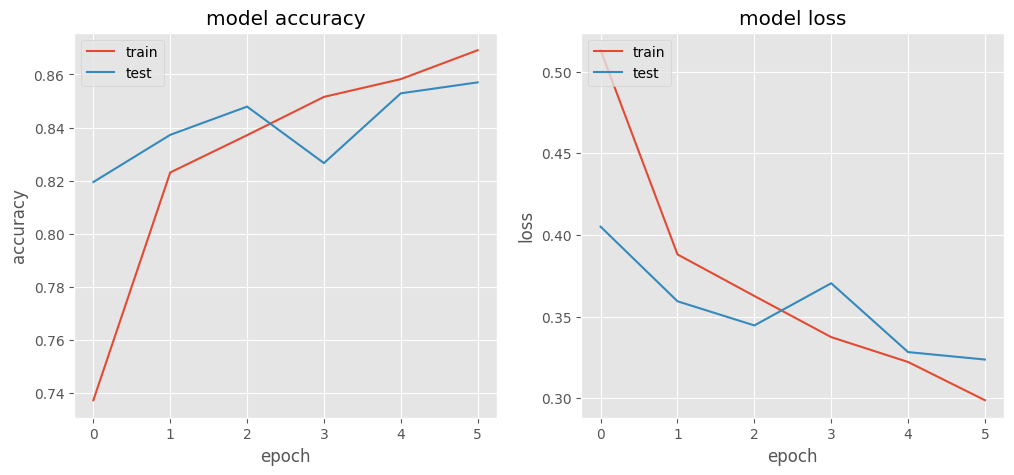

In [ ]:
plot_history(history)

$$$$

**RNN + CNN model**

In [ ]:
model = create_rnn_cnn_model(embedding_matrix)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 100)          9254700   
                                                                 
 conv1d_3 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 48, 128)           0         
 g1D)                                                            
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 9351853 (35.67 MB)
Trainable params: 97153 (379.50 KB)
Non-trainable params: 9254700 (35.30 MB)
__________

In [ ]:
history = train_model(model)

Epoch 1/6
250/250 [==============================] - 54s 210ms/step - loss: 0.6524 - acc: 0.6066 - val_loss: 0.6498 - val_acc: 0.6227
Epoch 2/6
250/250 [==============================] - 52s 208ms/step - loss: 0.6447 - acc: 0.6192 - val_loss: 0.6790 - val_acc: 0.5508
Epoch 3/6
250/250 [==============================] - 49s 196ms/step - loss: 0.6432 - acc: 0.6184 - val_loss: 0.6141 - val_acc: 0.6520
Epoch 4/6
250/250 [==============================] - 45s 179ms/step - loss: 0.5999 - acc: 0.6686 - val_loss: 0.5554 - val_acc: 0.7290
Epoch 5/6
250/250 [==============================] - 50s 201ms/step - loss: 0.5919 - acc: 0.6856 - val_loss: 0.6307 - val_acc: 0.6175
Epoch 6/6
250/250 [==============================] - 51s 206ms/step - loss: 0.5903 - acc: 0.6888 - val_loss: 0.5275 - val_acc: 0.7530


In [ ]:
evaluate_model(model)

313/313 [==============================] - 5s 17ms/step - loss: 0.5290 - acc: 0.7528
Test Score: 0.5290104150772095
Test Accuracy: 0.7527999877929688


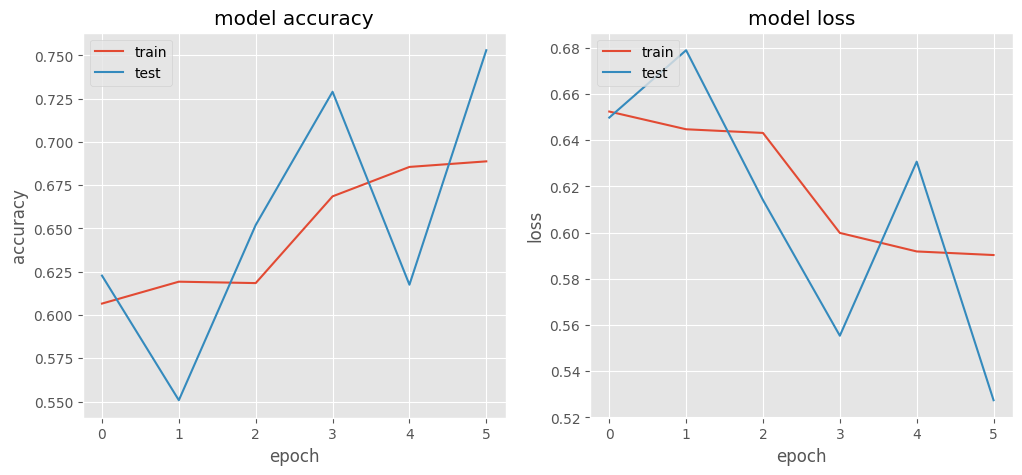

In [ ]:
plot_history(history)

$$$$

### Wor2Vec

**Prepare Embeddings**

In [ ]:
!wget https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
!gunzip /content/GoogleNews-vectors-negative300-SLIM.bin.gz

--2024-05-02 18:49:17--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276467217 (264M) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300-SLIM.bin.gz’

GoogleNews-vectors- 100%[===================>] 263.66M   302MB/s    in 0.9s    

2024-05-02 18:49:25 (302 MB/s) - ‘GoogleNews-vectors-negative300-SLIM.bin.gz’ saved [276467217/276467217]



In [ ]:
from gensim.models import KeyedVectors
word2vec_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300-SLIM.bin', binary=True)
word2vec_model

In [ ]:
word_embed = word2vec_model['meaningless']
print(f'vocab_size: {vocab_size}')
print(f'word embedding size {word_embed.shape}')
print(f'the first 8 values of the embedding are {word_embed[:8]}')
print(f'word embedding dtype: {word_embed.dtype}')

vocab_size: 92547
word embedding size (300,)
the first 8 values of the embedding are [ 0.08938539  0.00893007  0.07516499 -0.00344929 -0.07076344  0.04299979
  0.1374639  -0.025055  ]
word embedding dtype: float32


In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
print(f'Words that do not appear in the GloVe Embeddings:')
for word, i in tokenizer.word_index.items():
  if word in word2vec_model:
    embedding_vector = word2vec_model[word]
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  else:
    print(word, end=', ')
    embedding_vector = np.random.rand(300)

Words that do not appear in the GloVe Embeddings:
and, of, to, a, humour, hitchcock, favourite, theatre, hadn, keaton, seagal, tarzan, sinatra, eastwood, fulci, wwii, columbo, welles, stanwyck, pacino, bergman, lugosi, tarantino, flynn, connery, fianc, walken, colour, spielberg, grey, fonda, realise, brando, austen, matthau, argento, branagh, kubrick, streisand, giallo, cagney, sandler, carrey, altman, streep, miyazaki, cusack, griffith, bronson, damme, karloff, garfield, troma, cassavetes, carradine, widmark, lemmon, foxx, corman, ritter, behaviour, dvds, huston, ponyo, barrymore, sarandon, gere, denzel, brosnan, falk, rourke, mildred, voight, niro, hartley, heston, paulie, meryl, uwe, romero, quaid, realised, miike, leland, bettie, belushi, favour, cushing, widescreen, irene, stallone, orson, custer, hayworth, dillon, quentin, dunne, antonioni, elvira, kidman, herzog, bakshi, axe, amitabh, clooney, nolte, hepburn, travolta, astaire, macbeth, rhett, duvall, kline, errol, melville, pro

In [ ]:
embedding_matrix.shape

(92547, 300)

**LSTM**

In [ ]:
model = create_lstm_model(embedding_matrix, output_dim=300)
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 300)          27764100  
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 27983877 (106.75 MB)
Trainable params: 219777 (858.50 KB)
Non-trainable params: 27764100 (105.91 MB)
_________________________________________________________________


In [ ]:
history = train_model(model)

Epoch 1/6
250/250 [==============================] - 137s 531ms/step - loss: 0.4948 - acc: 0.7546 - val_loss: 0.4255 - val_acc: 0.8146
Epoch 2/6
250/250 [==============================] - 185s 740ms/step - loss: 0.4095 - acc: 0.8145 - val_loss: 0.3976 - val_acc: 0.8271
Epoch 3/6
250/250 [==============================] - 132s 525ms/step - loss: 0.3982 - acc: 0.8210 - val_loss: 0.3742 - val_acc: 0.8320
Epoch 4/6
250/250 [==============================] - 132s 527ms/step - loss: 0.3764 - acc: 0.8307 - val_loss: 0.3526 - val_acc: 0.8432
Epoch 5/6
250/250 [==============================] - 147s 589ms/step - loss: 0.3583 - acc: 0.8404 - val_loss: 0.3698 - val_acc: 0.8418
Epoch 6/6
250/250 [==============================] - 154s 615ms/step - loss: 0.3412 - acc: 0.8497 - val_loss: 0.3322 - val_acc: 0.8562


In [ ]:
evaluate_model(model)

313/313 [==============================] - 29s 92ms/step - loss: 0.3352 - acc: 0.8537
Test Score: 0.335189551115036
Test Accuracy: 0.8536999821662903


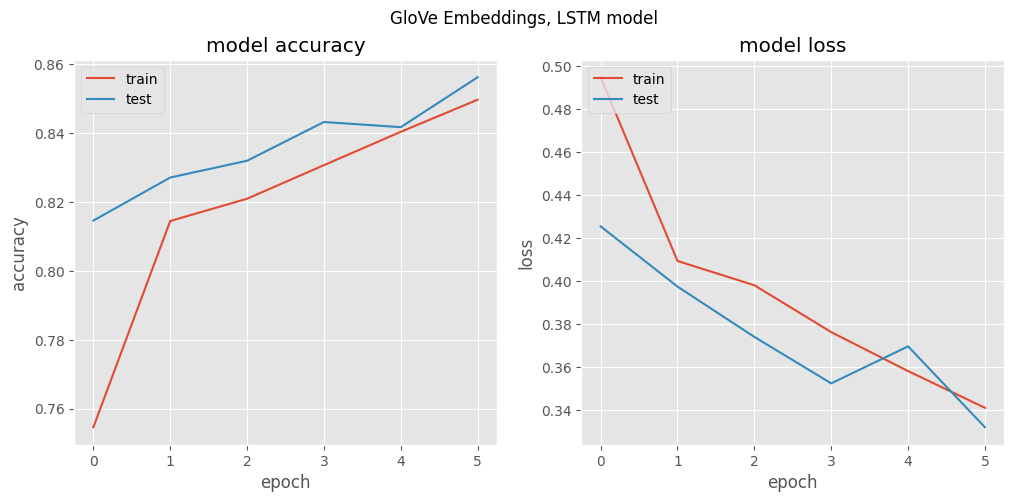

In [ ]:
plot_history(history, suptitle='GloVe Embeddings, LSTM model')

$$$$

**GRU**

In [ ]:
model = create_gru_model(embedding_matrix, output_dim=300)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          27764100  
                                                                 
 gru (GRU)                   (None, 128)               165120    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 27929349 (106.54 MB)
Trainable params: 165249 (645.50 KB)
Non-trainable params: 27764100 (105.91 MB)
_________________________________________________________________


In [ ]:
history = train_model(model)

Epoch 1/6
250/250 [==============================] - 7s 13ms/step - loss: 0.5259 - acc: 0.7290 - val_loss: 0.3936 - val_acc: 0.8215
Epoch 2/6
250/250 [==============================] - 2s 8ms/step - loss: 0.4113 - acc: 0.8105 - val_loss: 0.3634 - val_acc: 0.8394
Epoch 3/6
250/250 [==============================] - 2s 9ms/step - loss: 0.3672 - acc: 0.8371 - val_loss: 0.3434 - val_acc: 0.8496
Epoch 4/6
250/250 [==============================] - 2s 9ms/step - loss: 0.3505 - acc: 0.8435 - val_loss: 0.3331 - val_acc: 0.8535
Epoch 5/6
250/250 [==============================] - 2s 9ms/step - loss: 0.3360 - acc: 0.8521 - val_loss: 0.3389 - val_acc: 0.8509
Epoch 6/6
250/250 [==============================] - 2s 10ms/step - loss: 0.3294 - acc: 0.8572 - val_loss: 0.3293 - val_acc: 0.8566


In [ ]:
evaluate_model(model)

313/313 [==============================] - 2s 6ms/step - loss: 0.3297 - acc: 0.8530
Test Score: 0.32971370220184326
Test Accuracy: 0.8529999852180481


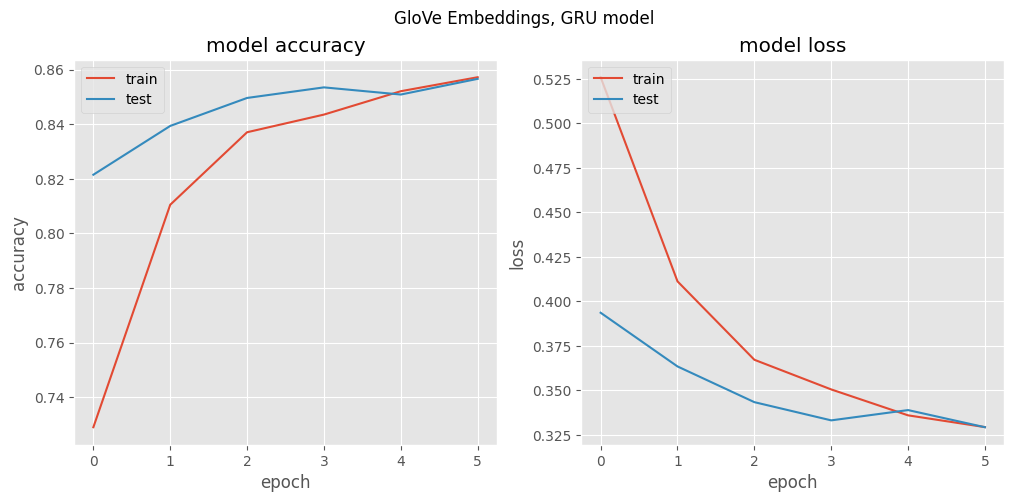

In [ ]:
plot_history(history, suptitle='GloVe Embeddings, GRU model')

$$$$

**RNN+CNN**

In [ ]:
model = create_rnn_cnn_model(embedding_matrix, output_dim=300)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          27764100  
                                                                 
 conv1d (Conv1D)             (None, 96, 128)           192128    
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 128)           0         
 D)                                                              
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 27989253 (106.77 MB)
Trainable params: 225153 (879.50 KB)
Non-trainable params: 27764100 (105.91 MB)
_____

In [ ]:
history = train_model(model)

Epoch 1/6
250/250 [==============================] - 14s 44ms/step - loss: 0.5212 - acc: 0.7317 - val_loss: 0.4345 - val_acc: 0.8112
Epoch 2/6
250/250 [==============================] - 9s 35ms/step - loss: 0.3950 - acc: 0.8283 - val_loss: 0.3763 - val_acc: 0.8329
Epoch 3/6
250/250 [==============================] - 11s 43ms/step - loss: 0.3464 - acc: 0.8535 - val_loss: 0.3712 - val_acc: 0.8378
Epoch 4/6
250/250 [==============================] - 10s 40ms/step - loss: 0.2909 - acc: 0.8792 - val_loss: 0.3358 - val_acc: 0.8566
Epoch 5/6
250/250 [==============================] - 9s 34ms/step - loss: 0.2354 - acc: 0.9062 - val_loss: 0.3719 - val_acc: 0.8419
Epoch 6/6
250/250 [==============================] - 11s 44ms/step - loss: 0.1830 - acc: 0.9284 - val_loss: 0.4217 - val_acc: 0.8468


In [ ]:
evaluate_model(model)

313/313 [==============================] - 3s 9ms/step - loss: 0.4135 - acc: 0.8487
Test Score: 0.4135081171989441
Test Accuracy: 0.8486999869346619


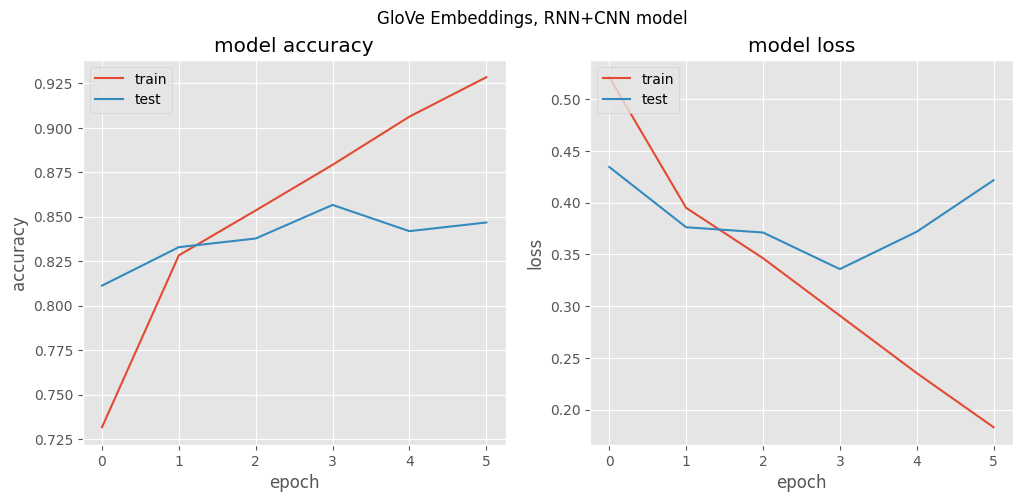

In [ ]:
plot_history(history, suptitle='GloVe Embeddings, RNN+CNN model')

$$$$

### FastText

**Prepare Embeddings**

In [ ]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec

--2024-05-02 18:55:01--  https://dl.fbaipublicfiles.com/fasttext/vectors-wiki/wiki.en.vec
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.33, 13.227.219.59, 13.227.219.70, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6597238061 (6.1G) [binary/octet-stream]
Saving to: ‘wiki.en.vec’

wiki.en.vec         100%[===================>]   6.14G   122MB/s    in 45s     

2024-05-02 18:55:46 (139 MB/s) - ‘wiki.en.vec’ saved [6597238061/6597238061]



In [ ]:
import codecs
f = codecs.open('wiki.en.vec', encoding='utf-8')

In [ ]:
embeddings_dictionary = {}
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_dictionary[word] = coefs

2519426it [06:49, 6159.49it/s]


In [ ]:
print(list(embeddings_dictionary.keys())[:10000])

['.', 'the', '</s>', 'of', '-', 'in', 'and', "'", ')', '(', 'to', 'a', 'is', 'was', 'on', 's', 'for', 'as', 'by', 'that', 'it', 'with', 'from', 'at', 'he', 'this', 'be', 'i', 'an', 'utc', 'his', 'not', '–', 'are', 'or', 'talk', 'which', 'also', 'has', 'were', 'but', 'have', '#', 'one', 'rd', 'new', 'first', 'page', 'no', 'you', 'they', 'had', 'article', 't', 'who', '?', 'all', 'their', 'there', 'been', 'made', 'its', 'people', 'may', 'after', '%', 'other', 'should', 'two', 'score', 'her', 'can', 'would', 'more', 'if', 'she', 'about', 'when', 'time', 'team', 'american', 'such', 'th', 'do', 'discussion', 'links', 'only', 'some', 'up', 'see', 'united', 'years', 'into', '/', 'school', 'so', 'world', 'university', 'during', 'out', 'state', 'states', 'national', 'wikipedia', 'year', 'most', 'city', 'over', 'used', 'then', 'd', 'than', 'county', 'external', 'm', 'where', 'will', 'de', 'what', 'delete', 'any', 'these', 'january', 'march', 'august', 'july', 'being', 'film', 'him', 'many', 'sout

In [ ]:
print(f'there is {len(embeddings_dictionary)} tokens in the FastText Embeddings')

there is 2519394 tokens in the FastText Embeddings


In [ ]:
embedding_vector = embeddings_dictionary['meaningless']

print(f'word embedding size {embedding_vector.shape}')
print(f'the first 8 values of the embedding are {embedding_vector[:8]}')
print(f'word embedding dtype: {embedding_vector.dtype}')

word embedding size (300,)
the first 8 values of the embedding are [-0.20268    0.0050772 -0.21167    0.40844    0.21979    0.07285
  0.075119  -0.43687  ]
word embedding dtype: float32


In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))
print(f'Words that do not belong in the FastText Embeddings: ')
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if (embedding_vector is not None) and not np.allclose(embedding_vector, 0):
        embedding_matrix[index] = embedding_vector
    else:
      print(word, end=', ')
      embedding_vector = np.random.rand(300)
      embedding_matrix[index] = embedding_vector

Words that do not belong in the FastText Embeddings: 
fianc, records, tokyo, risqu, trivialboring, polarisdib, grunnick, naivet, divorc, uzumakis, sinhue, monetero, ohwon, catiii, bakjwi, volont, tobell, seagals, zosch, tetsur, kazaf, thornway, wiedzmin, querette, hickcock, floraine, atrice, coulardeau, souffl, malefique, aurvaag, gaglia, klatret, rosenlski, brodsk, sampredo, ulein, bragana, darkhunters, rkarlen, iameracing, hongshen, grebbs, ripner, hateable, residenthazard, borefest, citizenx, almod, fanglys, mallachi, zellwegger, ashenbach, mcheath, delboys, thismovie, akyroyd, branaugh, lagerl, coudair, lazerov, gulfax, zipperface, shoppen, huggaland, liande, ossessa, iamaseal, blahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblahblah, paridiso, saarsgard, ferrot, splatterfest, adjl, kazihiro, hlots, avna, beckersted, elicot, niksen, asagoro, terrificly, thisfilm, gnatpole, mazello, stephanois, zomcom, mallepa, tabonga, nixflix, koqs, matographe, butante, mathau, moo

In [ ]:
embedding_matrix.shape

(92547, 300)

$$$$

**LSTM**

In [ ]:
model = create_lstm_model(embedding_matrix, output_dim=300)

In [ ]:
history = train_model(model)

Epoch 1/6
250/250 [==============================] - 13s 19ms/step - loss: 0.5065 - acc: 0.7507 - val_loss: 0.4141 - val_acc: 0.8185
Epoch 2/6
250/250 [==============================] - 4s 15ms/step - loss: 0.4103 - acc: 0.8137 - val_loss: 0.3811 - val_acc: 0.8305
Epoch 3/6
250/250 [==============================] - 4s 14ms/step - loss: 0.3820 - acc: 0.8287 - val_loss: 0.3712 - val_acc: 0.8334
Epoch 4/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3656 - acc: 0.8383 - val_loss: 0.3480 - val_acc: 0.8490
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3408 - acc: 0.8502 - val_loss: 0.3506 - val_acc: 0.8509
Epoch 6/6
250/250 [==============================] - 4s 14ms/step - loss: 0.3186 - acc: 0.8634 - val_loss: 0.3281 - val_acc: 0.8610


In [ ]:
evaluate_model(model)

313/313 [==============================] - 3s 8ms/step - loss: 0.3245 - acc: 0.8583
Test Score: 0.32445138692855835
Test Accuracy: 0.858299970626831


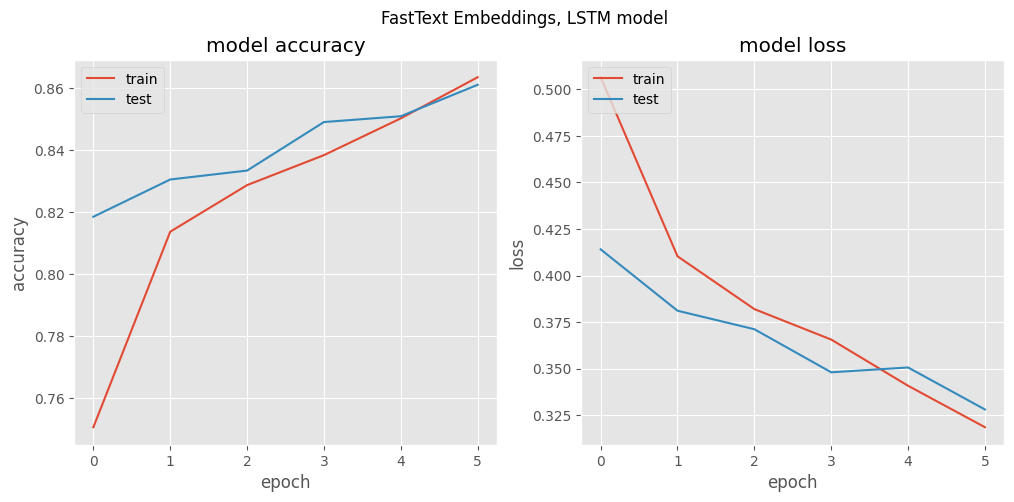

In [ ]:
plot_history(history, suptitle='FastText Embeddings, LSTM model')

$$$$

**GRU**

In [ ]:
model = create_gru_model(embedding_matrix, output_dim=300)

In [ ]:
history = train_model(model)

Epoch 1/6
250/250 [==============================] - 10s 17ms/step - loss: 0.5091 - acc: 0.7390 - val_loss: 0.3691 - val_acc: 0.8350
Epoch 2/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3638 - acc: 0.8385 - val_loss: 0.3395 - val_acc: 0.8500
Epoch 3/6
250/250 [==============================] - 3s 13ms/step - loss: 0.3336 - acc: 0.8538 - val_loss: 0.3241 - val_acc: 0.8570
Epoch 4/6
250/250 [==============================] - 3s 12ms/step - loss: 0.3170 - acc: 0.8652 - val_loss: 0.3211 - val_acc: 0.8560
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.2991 - acc: 0.8717 - val_loss: 0.3306 - val_acc: 0.8626
Epoch 6/6
250/250 [==============================] - 3s 12ms/step - loss: 0.2847 - acc: 0.8788 - val_loss: 0.3125 - val_acc: 0.8648


In [ ]:
evaluate_model(model)

313/313 [==============================] - 2s 6ms/step - loss: 0.3036 - acc: 0.8648
Test Score: 0.30357465147972107
Test Accuracy: 0.864799976348877


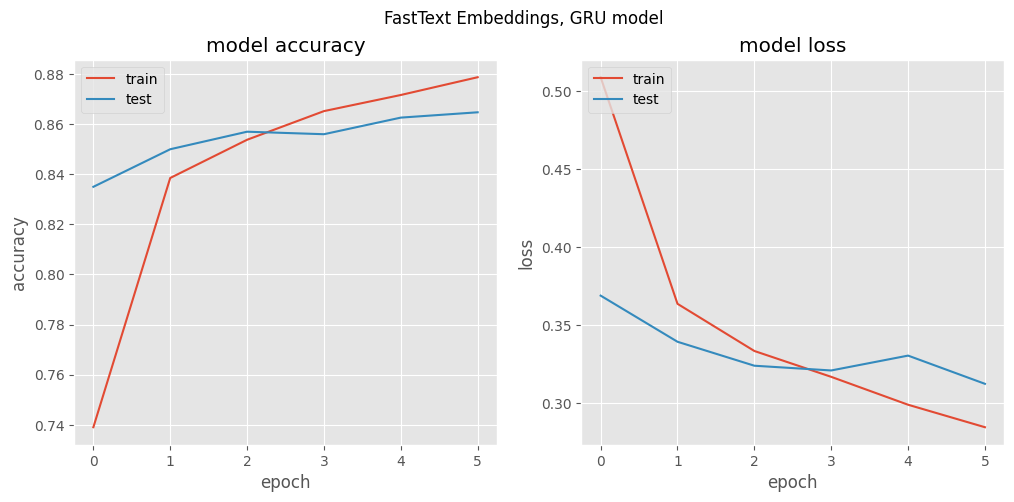

In [ ]:
plot_history(history, suptitle='FastText Embeddings, GRU model')

$$$$

**RNN+CNN**

In [ ]:
model = create_rnn_cnn_model(embedding_matrix, output_dim=300)

In [ ]:
history = train_model(model)

Epoch 1/6
250/250 [==============================] - 20s 65ms/step - loss: 0.6423 - acc: 0.6228 - val_loss: 0.5881 - val_acc: 0.6722
Epoch 2/6
250/250 [==============================] - 16s 64ms/step - loss: 0.5831 - acc: 0.6921 - val_loss: 0.6148 - val_acc: 0.6456
Epoch 3/6
250/250 [==============================] - 16s 64ms/step - loss: 0.5997 - acc: 0.6665 - val_loss: 0.5790 - val_acc: 0.6801
Epoch 4/6
250/250 [==============================] - 16s 64ms/step - loss: 0.5759 - acc: 0.6900 - val_loss: 0.5963 - val_acc: 0.6661
Epoch 5/6
250/250 [==============================] - 16s 63ms/step - loss: 0.5854 - acc: 0.6901 - val_loss: 0.6376 - val_acc: 0.6263
Epoch 6/6
250/250 [==============================] - 16s 64ms/step - loss: 0.6009 - acc: 0.6664 - val_loss: 0.6063 - val_acc: 0.6587


In [ ]:
evaluate_model(model)

313/313 [==============================] - 4s 11ms/step - loss: 0.6062 - acc: 0.6655
Test Score: 0.6062403917312622
Test Accuracy: 0.6654999852180481


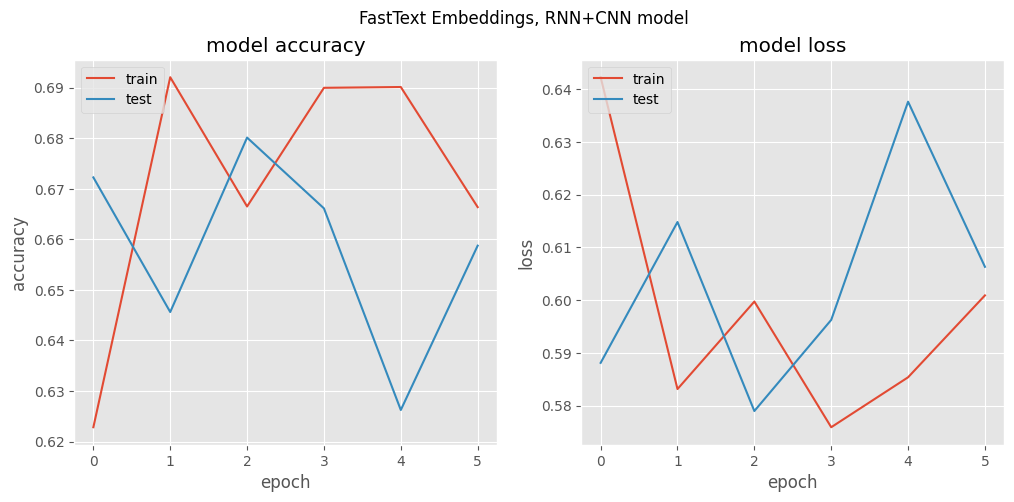

In [ ]:
plot_history(history, suptitle='FastText Embeddings, RNN+CNN model')

$$$$

### TF-IDF

**Prepare Data**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
## Hyperparameters
max_features = 256
epochs = 6
batch_size = 128

In [ ]:
vectorizer = TfidfVectorizer(max_features = max_features)

X_train_tf_idf = vectorizer.fit_transform(X_train)
X_test_tf_idf = vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf = X_train_tf_idf.toarray()
X_test_tf_idf = X_test_tf_idf.toarray()
X_train_tf_idf.shape,X_test_tf_idf.shape

((40000, 256), (10000, 256))

In [ ]:
X_train_tf_idf = np.expand_dims(X_train_tf_idf,axis=1)
X_test_tf_idf = np.expand_dims(X_test_tf_idf,axis=1)
X_train_tf_idf.shape,X_test_tf_idf.shape

((40000, 1, 256), (10000, 1, 256))

$$$$

**LSTM**

In [ ]:
model = Sequential([
  LSTM(128, input_shape=(1, max_features)),
  Dense(1, activation='sigmoid')]
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               197120    
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                                 
Total params: 197249 (770.50 KB)
Trainable params: 197249 (770.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_tf_idf, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 5s 13ms/step - loss: 0.5456 - acc: 0.7420 - val_loss: 0.4510 - val_acc: 0.7893
Epoch 2/6
250/250 [==============================] - 4s 15ms/step - loss: 0.4467 - acc: 0.7886 - val_loss: 0.4431 - val_acc: 0.7936
Epoch 3/6
250/250 [==============================] - 3s 12ms/step - loss: 0.4413 - acc: 0.7937 - val_loss: 0.4408 - val_acc: 0.7958
Epoch 4/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4391 - acc: 0.7929 - val_loss: 0.4421 - val_acc: 0.7961
Epoch 5/6
250/250 [==============================] - 5s 19ms/step - loss: 0.4383 - acc: 0.7944 - val_loss: 0.4400 - val_acc: 0.7954
Epoch 6/6
250/250 [==============================] - 7s 29ms/step - loss: 0.4376 - acc: 0.7930 - val_loss: 0.4404 - val_acc: 0.7968


In [ ]:
score = model.evaluate(X_test_tf_idf, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.4322 - acc: 0.8022
Test Score: 0.43219462037086487
Test Accuracy: 0.8022000193595886


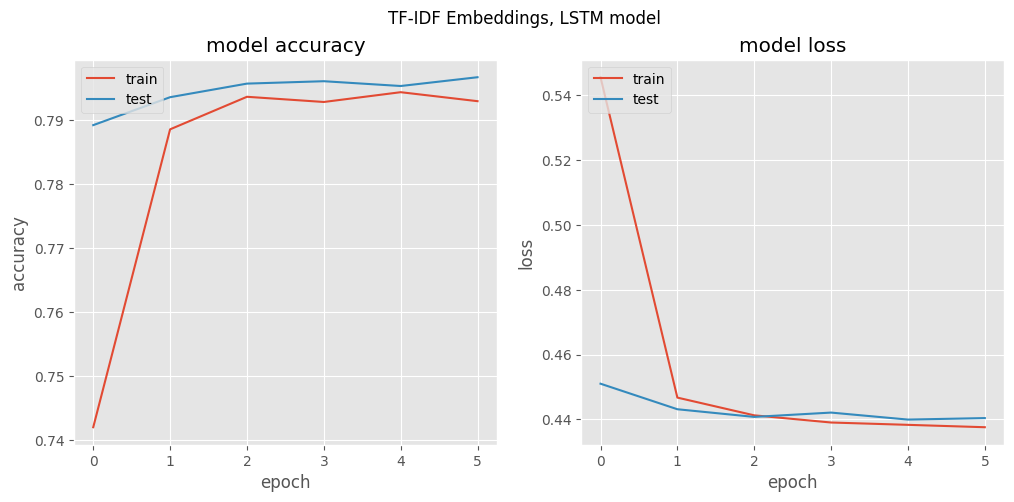

In [ ]:
plot_history(history, suptitle='TF-IDF Embeddings, LSTM model')

$$$$

**GRU**

In [ ]:
model = Sequential([
  GRU(128, input_shape=(1, max_features)),
  Dense(1, activation='sigmoid')]
)

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 128)               148224    
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 148353 (579.50 KB)
Trainable params: 148353 (579.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_tf_idf, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 9s 15ms/step - loss: 0.5355 - acc: 0.7475 - val_loss: 0.4531 - val_acc: 0.7889
Epoch 2/6
250/250 [==============================] - 5s 19ms/step - loss: 0.4470 - acc: 0.7881 - val_loss: 0.4436 - val_acc: 0.7968
Epoch 3/6
250/250 [==============================] - 5s 20ms/step - loss: 0.4427 - acc: 0.7925 - val_loss: 0.4461 - val_acc: 0.7954
Epoch 4/6
250/250 [==============================] - 3s 10ms/step - loss: 0.4414 - acc: 0.7927 - val_loss: 0.4428 - val_acc: 0.7956
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4407 - acc: 0.7920 - val_loss: 0.4424 - val_acc: 0.7954
Epoch 6/6
250/250 [==============================] - 5s 19ms/step - loss: 0.4396 - acc: 0.7929 - val_loss: 0.4423 - val_acc: 0.7946


In [ ]:
score = model.evaluate(X_test_tf_idf, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.4329 - acc: 0.8047
Test Score: 0.4328983426094055
Test Accuracy: 0.8047000169754028


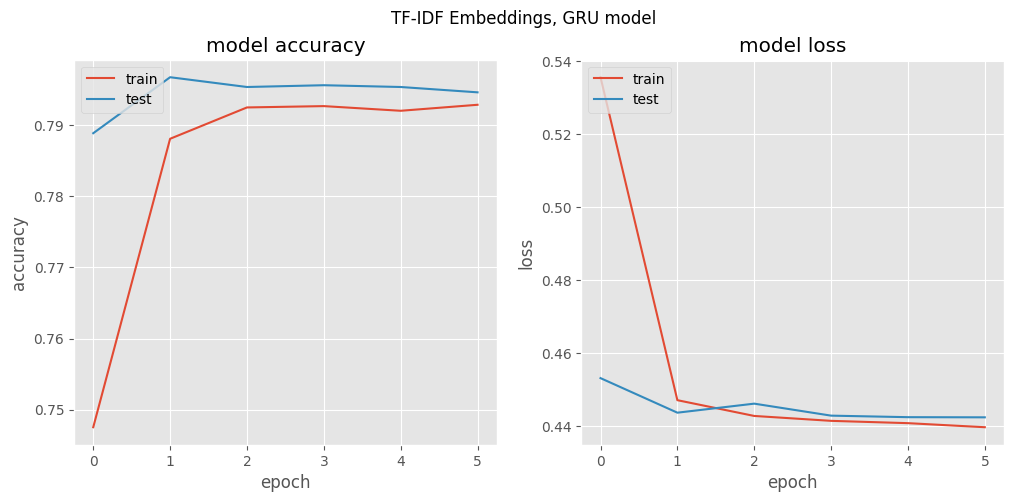

In [ ]:
plot_history(history, suptitle='TF-IDF Embeddings, GRU model')

$$$$

**RNN+CNN**

In [ ]:
model = Sequential([
  Conv1D(filters=128,
         kernel_size=5,
         activation='relu',
         input_shape=(1, max_features),
         padding='same'
         ),
  SimpleRNN(units=128),
  Dense(1, activation='sigmoid')
  ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 1, 128)            163968    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 196993 (769.50 KB)
Trainable params: 196993 (769.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [ ]:
history = model.fit(X_train_tf_idf, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        validation_split=0.2)

Epoch 1/6
250/250 [==============================] - 4s 11ms/step - loss: 0.4878 - acc: 0.7655 - val_loss: 0.4432 - val_acc: 0.7960
Epoch 2/6
250/250 [==============================] - 2s 8ms/step - loss: 0.4435 - acc: 0.7920 - val_loss: 0.4408 - val_acc: 0.7959
Epoch 3/6
250/250 [==============================] - 2s 9ms/step - loss: 0.4349 - acc: 0.7957 - val_loss: 0.4416 - val_acc: 0.7949
Epoch 4/6
250/250 [==============================] - 2s 9ms/step - loss: 0.4209 - acc: 0.8043 - val_loss: 0.4355 - val_acc: 0.7977
Epoch 5/6
250/250 [==============================] - 3s 13ms/step - loss: 0.4012 - acc: 0.8164 - val_loss: 0.4381 - val_acc: 0.7990
Epoch 6/6
250/250 [==============================] - 4s 14ms/step - loss: 0.3759 - acc: 0.8306 - val_loss: 0.4549 - val_acc: 0.7825


In [ ]:
score = model.evaluate(X_test_tf_idf, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4406 - acc: 0.7946
Test Score: 0.440629243850708
Test Accuracy: 0.7946000099182129


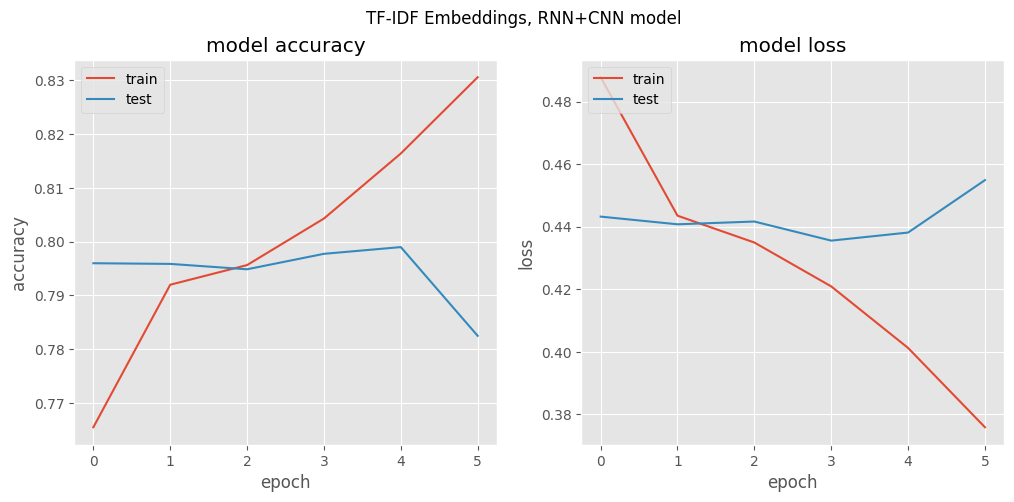

In [ ]:
plot_history(history, suptitle='TF-IDF Embeddings, RNN+CNN model')

$$$$

### Recap

In [ ]:
data = {
    'Word embedding': ['Glove', 'Word2vec', 'Fasttext', 'Tf-idf'],
    'LSTM': ['0.851', '0.853', '0.858', '0.802'],
    'GRU': ['0.853', '0.852', '0.864', '0.804'],
    'RNN + CNN': ['0.752', '0.848', '0.665', '0.794']
}

# Create a DataFrame
df = pd.DataFrame(data)
df = df.set_index('Word embedding')
df.T

Word embedding,Glove,Word2vec,Fasttext,Tf-idf
LSTM,0.851,0.853,0.858,0.802
GRU,0.853,0.852,0.864,0.804
RNN + CNN,0.752,0.848,0.665,0.794


>
  * **1. Word Embedding et Modèles de Réseaux de Neurones:**
    * Les modèles LSTM et GRU semblent généralement bien performants avec toutes les Embedding.
    * Les performances des modèles LSTM et GRU sont relativement similaires entre elles pour chaque type d'embedding.

  * **2. Différences entre les types d'Embedding de Mots:**
    * GloVe, Word2Vec et FastText semblent donner de meilleures performances que la méthode TF-IDF pour les modèles LSTM et GRU.
    * FastText semble le plus performant, suivie de près par Word2Vec et GloVe, tandis que TF-IDF donne les résultats les moins performants pour ces modèles.

  * **3. Impact de la Combinaison de RNN et CNN:**
    * Pour la combinaison de RNN et CNN, les performances varient davantage en fonction de l'embedding.
    * FastText reste généralement la méthode la plus performante, mais la différence est considérable avec LSTM et GRU.


$$$$

## Transformer

> On a pu entrainé un model de transformer telque distilbert ou bien bert-base-uncased ou bien entrainé un from scratch mais cela peut prendre  un temps, Parcontre On a trouvé un model sur `HuggingFace` qui a été entrainé sur le dataset `imdb` [distilbert-imdb](https://huggingface.co/lvwerra/distilbert-imdb)

**Training results of the model**

| Training Loss | Epoch | Step | Validation Loss | Accuracy
| --- | --- | --- | --- | --- |
| 0.2195 | 1.0 | 1563 | 0.1903 | 0.928

$$$$

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("lvwerra/distilbert-imdb")

In [ ]:
from transformers import TFAutoModelForSequenceClassification

model = TFAutoModelForSequenceClassification.from_pretrained("lvwerra/distilbert-imdb",from_pt=True)

In [ ]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

In [ ]:
def inference(X=X_test,batch_size = 32):
    print(f'nombre d\'exmple dans le dataset: {len(X)}')
    num_batches = (len(X) + batch_size - 1) // batch_size
    predicted_labels_list = []

    for i in tqdm(range(num_batches)):
        start_index = i * batch_size
        end_index = min((i + 1) * batch_size, len(X))

        batch_encodings = tokenizer(X[start_index:end_index],
                                    truncation=True,
                                    padding=True,
                                    return_tensors='tf')

        logits = model(**batch_encodings).logits
        classes = tf.math.argmax(logits, axis=-1).numpy()

        predicted_labels_list.append(classes)

    predicted_labels_np = np.concatenate(predicted_labels_list)
    return predicted_labels_np

In [ ]:
predicted_labels_test = inference()
accuracy = accuracy_score(y_test, predicted_labels_test)
print("Accuracy:", accuracy)

Accuracy: 0.9316


In [ ]:
predicted_labels_all = inference(X=X)
accuracy = accuracy_score(y, predicted_labels_all)
print("Accuracy whole Dataset:", accuracy)

nombre d'exmple dans le dataset: 50000


100%|██████████| 1563/1563 [16:51<00:00,  1.55it/s]

Accuracy whole Dataset: 0.9313


In [ ]:
pd.options.display.max_colwidth = 360

misclassified_sentiments = y[y != predicted_labels_all]
misclassified_sentiments = ['Positive' if x==1 else 'Negative' for x in misclassified_sentiments]
df_misclassified = {
    'reviews': np.array(X)[y != predicted_labels_all],
    'sentiment': misclassified_sentiments
}
pd.DataFrame(df_misclassified)

,reviews,sentiment
0,I thought that Mukhsin has been wonderfully written Its not just about entertainment There tonnes of subtle messages that think Yasmin was trying to bring across And yes it might be confusing to some of you especially if you didn watch Sepet and or Gubra for times bet noticed how they use characters from the two movies before right Its really ironic how ...,Positive
1,Okay last night August th had the distinct displeasure of meeting Mr Van Bebble at showing of the film The Manson Family at the Three Penny in Chicago as part of the Chicago Underground Film Festival Here what have to say about it First of all the film is an obvious rip off of every Kenneth Anger Roman Polanski Oliver Stone and Terry Gilliam movie ve eve...,Negative
2,No this hilariously horrible made for TV horror clinker isn about deadly demonically possessed dessert cake Still this exceptionally awful yet undeniably amusing and thus enjoyable cathode ray refuse reaches breathtaking apex of absolute unremitting silliness and atrociousness that quite tasty in so execrable it downright awesome sort of way Richard Cren...,Positive
3,Despite later claims this early talkie melodrama has very little in common with Citizen Kane It a biopic of ruthless but human fictional plutocrat told in flashback but hopping around time The scriptwriter Preston Sturges shows none of his later gift for sparkling dialog and none of the myriad cinematic innovations of Kane are evident Still it very watch...,Positive
4,I remember seeing this film in the mid thought it well paced and well acted piece now work quite often in Berkeley Square and the had to get copy of DVD to remind myself how little the area has changed although my office is newish it just seconds away from the bank Even Jack Barclays car dealership is still there selling Bentleys and Rolls Royces It look...,Positive
...,...,...
3430,One would expect movie with famous comedian in the lead role to be funny movie This is not the case here laughed out loud once throughout the whole movie and that wasn even during the final comedy scene which one would also expect to be the funniest This is one you can watch when it comes to TV don spend any other money renting it,Negative
3431,The movie is not that bad Ringo Lam sucks hate when Van Damme has love in his movies van Damme is good only when he doesn have love in his movies,Negative
3432,Scientists at remote lab experiment on insert scaly creature here and create out of control monsters In the meantime crack military team the scientist daughter bank robbers find their way to the remote place and are menaced by the giant critters One by one they re eaten all during an exciting race to not be blown up by the forces who initially created t...,Negative
3433,I have NOT seen this movie but must Having read all three of Thor Heyerdahl books Kon Tiki Ra and Aku Aku am actively looking for copy of this movie The thesis that Peruvians migrated to Polynesia is alive and well Considering that this crew had NO GPS and only an old fashioned valve tube radio with watt output their voyage was heroic to say the least Pl...,Positive


In [ ]:
data = {
    'Model': ['distilbert-imdb'],
    'Test': [0.9316],
    'Whole Data': [0.9313],
}
pd.DataFrame(data)

,Model,Test,Whole Data
0,distilbert-imdb,0.9316,0.9313


> Ce modèle est entrainé seulement pour une epoch et dépasse les autres modèles (LSTM et GRU) en terme d'accuracy